# 逻辑回归
* 包的导入
* 数据读取
* 划分训练集和测试集

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score
import pickle

with open(r'分类数据.pkl',"rb") as f:
    data,label = pickle.load(f)

X_train, X_test, y_train, y_test = train_test_split(data, label, train_size = 0.75, test_size = 0.25, random_state=1)

* 建立逻辑回归模型

In [2]:
'''
    LogisticRegression
    
    主要参数：
    penalty：添加正则化方式，‘l1’，‘l2’，默认‘l2’
    tol：设置误差，小于设置的值时停止
    C：正则化强度的倒数
    fit_intercept：是否将常数添加到决策函数中
    solver：设置优化的方式，liblinear：坐标轴下降法优化
                         lbfgs：拟牛顿法优化
                         sag：小批量梯度下降法
    max_iter：最大迭代次数
    multi_class：分类方式选择参数，'ovr'或'multinomial'
    n_jobs：并行数。int类型，默认为1。
            1的时候，用CPU的一个内核运行程序，2的时候，用CPU的2个内核运行程序。
            为-1的时候，用所有CPU的内核运行程序。
    random_state：随机种子
    
    返回结果：
    coef_：权重
    intercept_：偏置
'''

model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
print("权重:\n",model.coef_)
print("偏置:\n",model.intercept_)

权重:
 [[ 1.78363181 -2.04516561]]
偏置:
 [2.72013562]


/Users/zu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 查看测试集准确率
* 查看数据分类效果

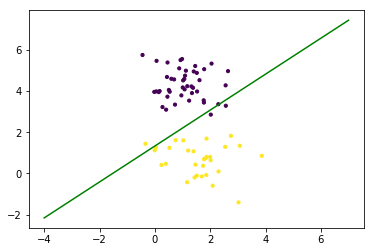

准确率：
 0.96


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# 训练集预测结果
y_pred = model.predict(X_test)

# 绘制决策边界
plt.scatter(X_test[:,0],X_test[:,1], marker='o',c=y_test,s=10)

X= [i for i in range(-4,8,1)]
Y = [-model.coef_[0][0]/model.coef_[0][1]*i-model.intercept_[0]/model.coef_[0][1] for i in X]
plt.plot(X,Y,color='g',linestyle='-')
plt.show()

# 计算准确率
print("准确率：\n",accuracy_score(y_true=y_test,y_pred=y_pred))